### Project2

In [46]:
# import libraries!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display

In [47]:
# read the dataset
data = pd.read_excel("WA_Fn-UseC_-Telco-Customer-Churn.xlsx", na_values=[" "])

print("Dimension of the dataset: {}".format(data.shape))

#Changing from int to categorical
data['SeniorCitizen']=pd.Categorical(data['SeniorCitizen']) 

# deleting the customerID features since it doesn't give any information about the churn..
del data["customerID"]
data = data.dropna() # drop NA values

# splitting the dataset to numeric and non-numeric 
numeric = data.select_dtypes(include = ['float64','int64'])
non_numeric = data.select_dtypes(exclude = ['float64','int64'])

Dimension of the dataset: (7043, 21)


The dataset has 7043 samples and 21 features. The features includes demographic information about the costumer like gender, age, if he/she has partner and dependents, type of services that the customer has signed up for. Also, account information like how long has been a costumer, contract, payment method, paperless billing, monthly charges and total chargers. Lastly, we have the churn feature which refers to the customers who left the company in the past month.

In [48]:
# print the first 5 rows to see what the dataset is about
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [49]:
numeric.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [50]:
non_numeric.describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


In [51]:
data.groupby('Churn').size()

Churn
No     5163
Yes    1869
dtype: int64

From above outputs we get an idea of what the data is about. Also, we can see how many costumer left the past month!

After, we are going to understand the correlation between the features by creating some plots. We will begin with the numerics features. Since we want to find a way to retain the customers, we must find the correlation between our features and the 'Churn'. For example, how much the 'tenure' or 'MonthlyChanges' affect the decision of customers to leave the company, are these features good or bad predictos for the 'Churn' ?

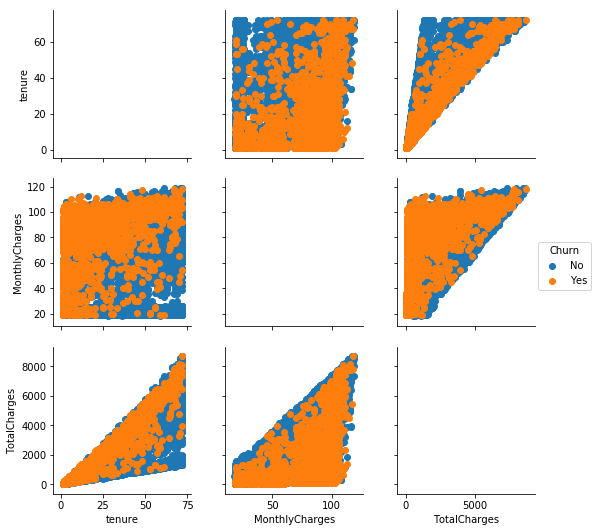

In [52]:
#Add the 'Churn' variable to the numeric dataset
numeric = pd.concat([numeric, data["Churn"]], axis=1)

plot = sns.PairGrid(numeric, hue = "Churn")
plot = plot.map_offdiag(plt.scatter)
plot = plot.add_legend()

From the pairgrid above we can see that both 'tenure' and 'MonthlyCharges' seems to be good predictors for our target variable ('Churn'). How did we see that 'tenure' and 'MonthlyCharges' are good predictors ? Well, if we see at the plot between them, we can 'easily' separate customers that have churn 'No' from others who have 'Yes'. So, we can 'easily' guess for a customer based on his monthly charges and tenure if he is going to leave or not. And if he is about to leave, we can descrease his monthly charges, for example!

Now, its time for the non numeric features to be plotted. We are going to use histograms!

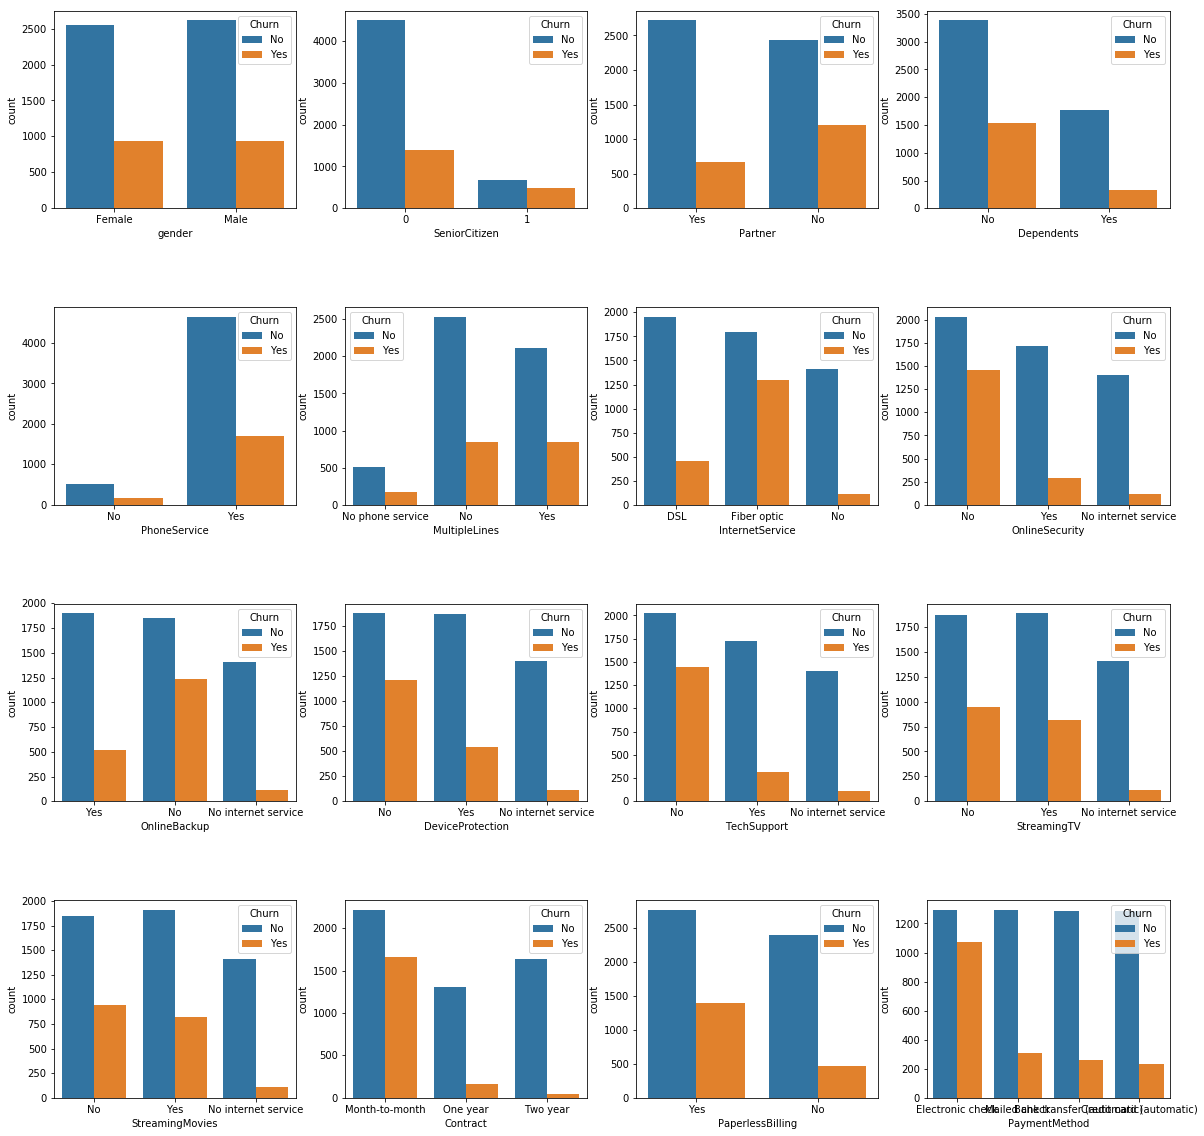

In [53]:
figure,ax =plt.subplots(4,4,figsize=(20,20))
figure.subplots_adjust(hspace=0.5)

# for all non numeric features
for i in range(0,16):
    plot = sns.countplot(x = non_numeric.iloc[:,i], hue=non_numeric["Churn"], ax=ax[divmod(i,4)])

By looking at the 'Contract' histogram, we can understand that it is a good predictor, since 'Month-to-month' has so many 'Yes' churn than 'one year contract' or 'two-year'. By this we can reach to conclusion that if someone has 'month-to-month' contract, probably he will leave!. Also, another good predictor might be the 'PaymentMethod' by looking how many 'Yes' churn has the 'Electronic check' in comparison with the other two methods.

Since we got the basic idea for our features and the correlation with the target variable, its time to build our machine learning model to predict the 'Churn' by looking at the features!

In [54]:
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# drop by Name
df1 = data.drop(["tenure", "MonthlyCharges", "TotalCharges"], axis=1)

df1_dummy = pd.get_dummies(df1)

#X_train = df1_dummy.drop(["Churn_Yes", "Churn_No"])
X = pd.concat([df1_dummy, data[["tenure", "MonthlyCharges", "TotalCharges"]]], axis=1)
del X["Churn_Yes"]
del X["Churn_No"]

y = df1_dummy["Churn_Yes"]

#split to train and test sets!
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.8, random_state=42)
fitted = clf_gini.fit(X_train, y_train)

fitted.score(X_test,y_test)

0.72200497689299681